In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter 
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [16]:
df = pd.read_csv(r"C:\Users\YOUSUF SHABIBI\Downloads\Twittwe\twitter_training.csv")

In [17]:
df.head()

,Numbers,Company,Emotion,Comments
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Numbers   74682 non-null  int64 
 1   Company   74682 non-null  object
 2   Emotion   74682 non-null  object
 3   Comments  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


#### Analysing the data

In [19]:
#removing the special char number and punctuation

df['Comments'] = df['Comments'].str.replace('[^a-zA-Z#]','')

In [20]:
df.head()

,Numbers,Company,Emotion,Comments
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [21]:
# Converting in string
df['Comments'] = df['Comments'].astype(str)

In [22]:
# filling the missing values
df['Comments'] = df['Comments'].fillna('')

In [23]:
# Tokenizing the sentence mean breaking down the sentence into small words or token
tokenized_text = df['Comments'].apply(lambda x: x.split())


In [24]:
tokenized_text.head()

0    [im, getting, on, borderlands, and, i, will, m...
1    [I, am, coming, to, the, borders, and, I, will...
2    [im, getting, on, borderlands, and, i, will, k...
3    [im, coming, on, borderlands, and, i, will, mu...
4    [im, getting, on, borderlands, 2, and, i, will...
Name: Comments, dtype: object

In [25]:
nltk.download('stopwords')

all_words = [word for comment in tokenized_text for word in comment]
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word not in stop_words]

word_counts = Counter(filtered_words)

[nltk_data] Downloading package stopwords to C:\Users\YOUSUF
[nltk_data]     SHABIBI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


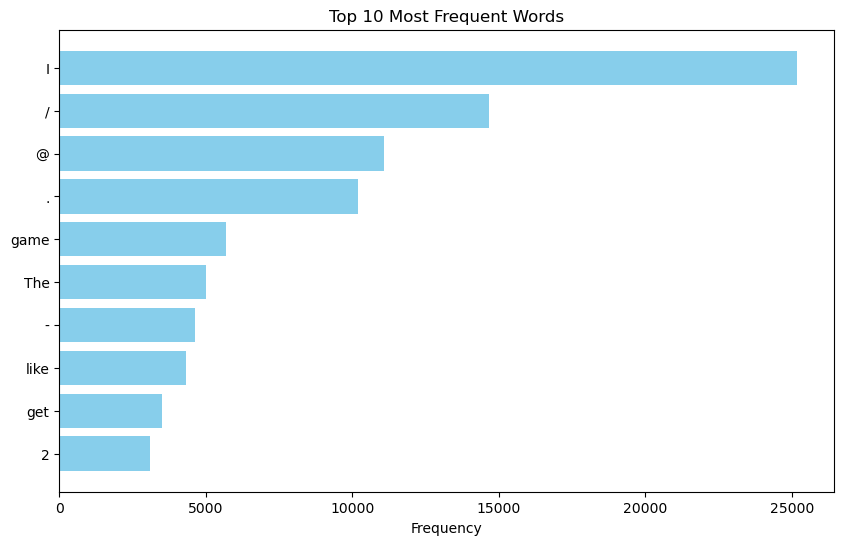

In [26]:
top_n = 10
top_words = word_counts.most_common(top_n)
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title(f'Top {top_n} Most Frequent Words')
plt.gca().invert_yaxis()  # Invert to show the highest frequency at the top
plt.show()


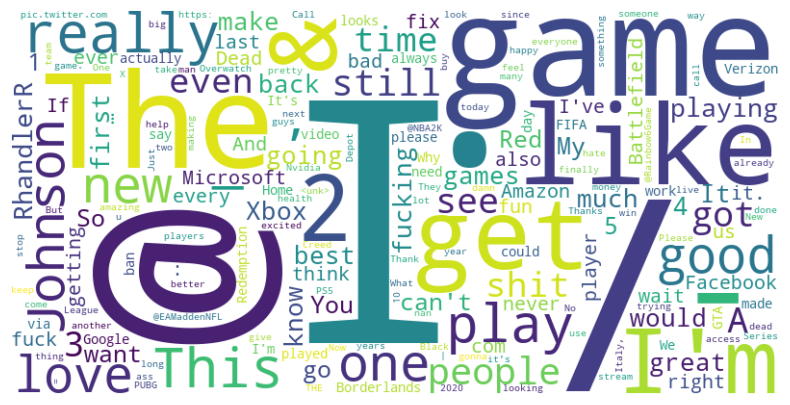

In [27]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0, 0.5, 'Count')

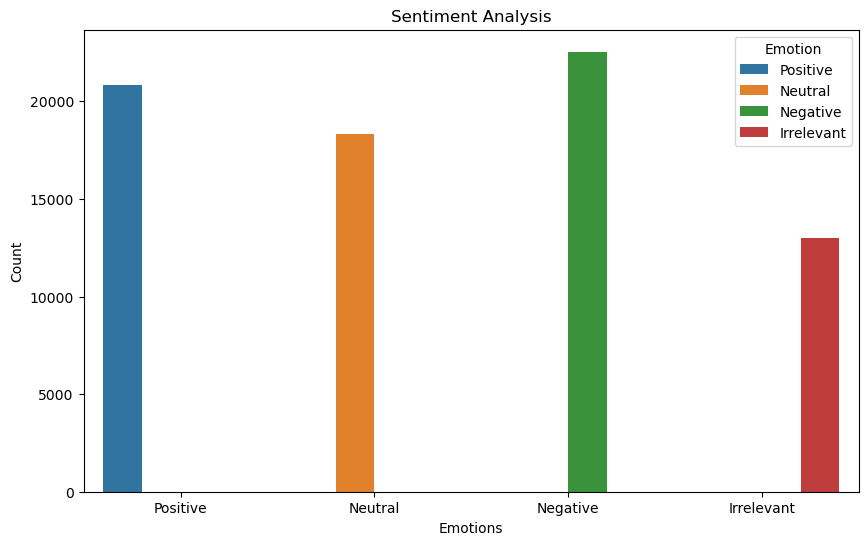

In [31]:
plt.figure(figsize=(10,6))

sns.countplot(x='Emotion',data=df,hue='Emotion')
plt.title("Sentiment Analysis")
plt.xlabel('Emotions')
plt.ylabel('Count')

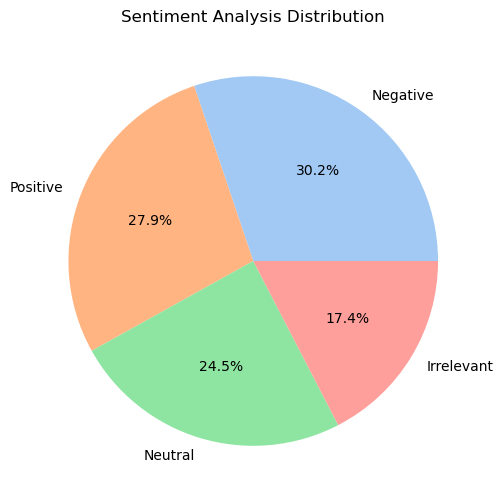

In [34]:
# Pie Chart 
emotion_counts = df['Emotion'].value_counts()
plt.figure(figsize=(10,6))

plt.pie(emotion_counts,labels=emotion_counts.index, autopct='%1.1f%%',colors=sns.color_palette('pastel'))
plt.title("Sentiment Analysis Distribution")
plt.show()